In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [10]:
data = pd.read_csv("heart.csv")
data = sk.utils.shuffle(data, random_state=1)

dataset = data.values

X = dataset[:,0:13]
Y = dataset[:,13:]

In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


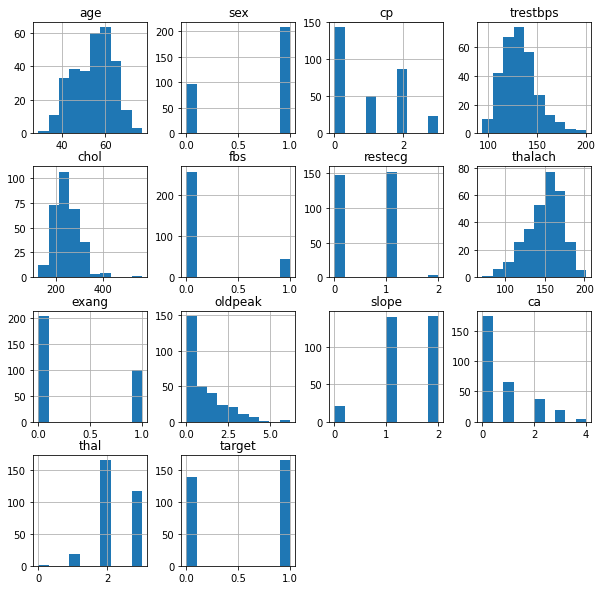

In [14]:
plt.rc('font', size=10)
data.hist(figsize=(10,10))
plt.show()

In [16]:
corr = data.corr()
corr.style.background_gradient().set_precision(2)

C:\Users\LIAMGL~1\AppData\Local\Temp/ipykernel_16996/4185346061.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient().set_precision(2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


<h3>Model 1</h3>

Epoch 1/50
4/4 [==============================] - 1s 71ms/step - loss: 8.3955 - acc: 0.5320 - val_loss: 0.6875 - val_acc: 0.4500
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 0.6881 - acc: 0.4975 - val_loss: 0.6835 - val_acc: 0.4500
Epoch 3/50
4/4 [==============================] - 0s 19ms/step - loss: 0.6864 - acc: 0.5025 - val_loss: 0.6791 - val_acc: 0.4500
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 0.6817 - acc: 0.5222 - val_loss: 0.6720 - val_acc: 0.5900
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 0.6786 - acc: 0.4631 - val_loss: 0.6667 - val_acc: 0.4700
Epoch 6/50
4/4 [==============================] - 0s 19ms/step - loss: 0.6749 - acc: 0.5025 - val_loss: 0.6638 - val_acc: 0.4900
Epoch 7/50
4/4 [==============================] - 0s 16ms/step - loss: 0.6742 - acc: 0.5320 - val_loss: 0.6640 - val_acc: 0.4900
Epoch 8/50
4/4 [==============================] - 0s 16ms/step - loss: 0.6749 - acc: 0.5567 - val

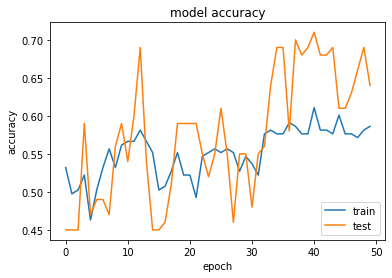

In [71]:
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=64, verbose=1, shuffle=True)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h3>Model 2</h3>

Epoch 1/75
1/1 [==============================] - 1s 729ms/step - loss: 3.6368 - acc: 0.4778 - val_loss: 2.1699 - val_acc: 0.3100
Epoch 2/75
1/1 [==============================] - 0s 26ms/step - loss: 1.6226 - acc: 0.4187 - val_loss: 1.4776 - val_acc: 0.4500
Epoch 3/75
1/1 [==============================] - 0s 29ms/step - loss: 1.4664 - acc: 0.4483 - val_loss: 1.7866 - val_acc: 0.5600
Epoch 4/75
1/1 [==============================] - 0s 28ms/step - loss: 1.9971 - acc: 0.5025 - val_loss: 1.7171 - val_acc: 0.5900
Epoch 5/75
1/1 [==============================] - 0s 26ms/step - loss: 1.9322 - acc: 0.5074 - val_loss: 1.3403 - val_acc: 0.5700
Epoch 6/75
1/1 [==============================] - 0s 36ms/step - loss: 1.4673 - acc: 0.5123 - val_loss: 0.9650 - val_acc: 0.5000
Epoch 7/75
1/1 [==============================] - 0s 31ms/step - loss: 0.9495 - acc: 0.4680 - val_loss: 1.0373 - val_acc: 0.2800
Epoch 8/75
1/1 [==============================] - 0s 30ms/step - loss: 0.9031 - acc: 0.4286 - va

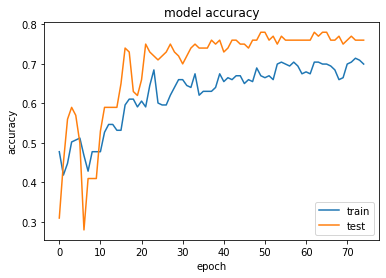

In [28]:
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=75, batch_size=303, verbose=1, shuffle=True)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h3>Model 3</h3>

Epoch 1/75
1/1 [==============================] - 1s 516ms/step - loss: 20.9514 - acc: 0.4778 - val_loss: 11.9733 - val_acc: 0.4100
Epoch 2/75
1/1 [==============================] - 0s 26ms/step - loss: 11.4582 - acc: 0.4778 - val_loss: 2.0806 - val_acc: 0.4200
Epoch 3/75
1/1 [==============================] - 0s 30ms/step - loss: 2.1976 - acc: 0.4828 - val_loss: 4.8953 - val_acc: 0.5900
Epoch 4/75
1/1 [==============================] - 0s 31ms/step - loss: 5.8782 - acc: 0.5222 - val_loss: 7.8831 - val_acc: 0.5900
Epoch 5/75
1/1 [==============================] - 0s 29ms/step - loss: 9.3755 - acc: 0.5222 - val_loss: 8.4753 - val_acc: 0.5900
Epoch 6/75
1/1 [==============================] - 0s 27ms/step - loss: 10.0776 - acc: 0.5222 - val_loss: 7.5035 - val_acc: 0.5900
Epoch 7/75
1/1 [==============================] - 0s 31ms/step - loss: 8.9595 - acc: 0.5222 - val_loss: 5.4447 - val_acc: 0.5900
Epoch 8/75
1/1 [==============================] - 0s 31ms/step - loss: 6.5756 - acc: 0.5222 

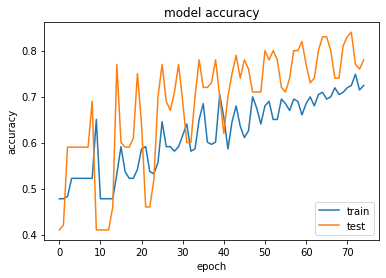

In [31]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=75, batch_size=303, verbose=1, shuffle=True)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h3>Model 4</h3>

Epoch 1/75
1/1 [==============================] - 1s 547ms/step - loss: 8.3737 - acc: 0.5222 - val_loss: 5.9583 - val_acc: 0.4100
Epoch 2/75
1/1 [==============================] - 0s 25ms/step - loss: 5.1185 - acc: 0.4778 - val_loss: 3.6101 - val_acc: 0.4100
Epoch 3/75
1/1 [==============================] - 0s 26ms/step - loss: 3.0869 - acc: 0.4778 - val_loss: 2.0480 - val_acc: 0.5900
Epoch 4/75
1/1 [==============================] - 0s 30ms/step - loss: 2.3651 - acc: 0.5222 - val_loss: 2.4113 - val_acc: 0.5900
Epoch 5/75
1/1 [==============================] - 0s 32ms/step - loss: 2.8121 - acc: 0.5222 - val_loss: 0.6952 - val_acc: 0.6000
Epoch 6/75
1/1 [==============================] - 0s 35ms/step - loss: 0.8219 - acc: 0.5616 - val_loss: 2.5766 - val_acc: 0.4100
Epoch 7/75
1/1 [==============================] - 0s 33ms/step - loss: 2.4722 - acc: 0.4877 - val_loss: 2.7829 - val_acc: 0.4100
Epoch 8/75
1/1 [==============================] - 0s 33ms/step - loss: 2.7203 - acc: 0.4877 - va

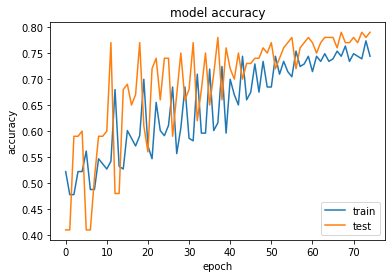

In [38]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=75, batch_size=303, verbose=1, shuffle=True)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h3>Model 5</h3>

Epoch 1/150
1/1 [==============================] - 1s 802ms/step - loss: 1.4523 - acc: 0.5123 - val_loss: 16.4919 - val_acc: 0.4100
Epoch 2/150
1/1 [==============================] - 0s 34ms/step - loss: 14.8987 - acc: 0.4778 - val_loss: 1.5097 - val_acc: 0.4100
Epoch 3/150
1/1 [==============================] - 0s 33ms/step - loss: 1.5212 - acc: 0.4778 - val_loss: 3.6638 - val_acc: 0.5900
Epoch 4/150
1/1 [==============================] - 0s 45ms/step - loss: 4.2880 - acc: 0.5222 - val_loss: 0.7625 - val_acc: 0.5900
Epoch 5/150
1/1 [==============================] - 0s 39ms/step - loss: 0.9045 - acc: 0.5369 - val_loss: 1.2382 - val_acc: 0.4300
Epoch 6/150
1/1 [==============================] - 0s 37ms/step - loss: 1.2796 - acc: 0.4778 - val_loss: 1.4808 - val_acc: 0.5900
Epoch 7/150
1/1 [==============================] - 0s 34ms/step - loss: 1.7531 - acc: 0.5222 - val_loss: 1.2032 - val_acc: 0.4300
Epoch 8/150
1/1 [==============================] - 0s 36ms/step - loss: 1.2798 - acc: 0

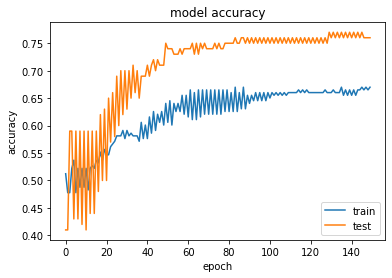

In [45]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=303, verbose=1, shuffle=True)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h3>Model 6</h3>

Epoch 1/150
1/1 [==============================] - 1s 962ms/step - loss: 0.6981 - acc: 0.5369 - val_loss: 65.0259 - val_acc: 0.5900
Epoch 2/150
1/1 [==============================] - 0s 74ms/step - loss: 75.3610 - acc: 0.5222 - val_loss: 16.6301 - val_acc: 0.4100
Epoch 3/150
1/1 [==============================] - 0s 86ms/step - loss: 15.3305 - acc: 0.4778 - val_loss: 7.6965 - val_acc: 0.5900
Epoch 4/150
1/1 [==============================] - 0s 81ms/step - loss: 8.9427 - acc: 0.5222 - val_loss: 0.6622 - val_acc: 0.5900
Epoch 5/150
1/1 [==============================] - 0s 82ms/step - loss: 0.7588 - acc: 0.5222 - val_loss: 5.7821 - val_acc: 0.4100
Epoch 6/150
1/1 [==============================] - 0s 80ms/step - loss: 5.4113 - acc: 0.4778 - val_loss: 1.5447 - val_acc: 0.4100
Epoch 7/150
1/1 [==============================] - 0s 82ms/step - loss: 1.4787 - acc: 0.4778 - val_loss: 1.9055 - val_acc: 0.5900
Epoch 8/150
1/1 [==============================] - 0s 80ms/step - loss: 2.2233 - acc:

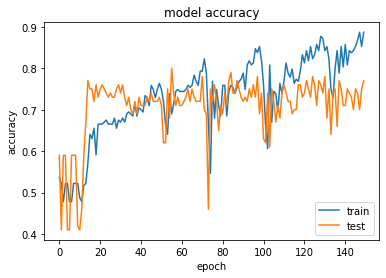

In [53]:
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(8092, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=303, verbose=1, shuffle=True)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h3>Model 7 (Best Model)</h3>

Epoch 1/600
1/1 [==============================] - 1s 771ms/step - loss: 0.7002 - acc: 0.5222 - val_loss: 6.3308 - val_acc: 0.4100
Epoch 2/600
1/1 [==============================] - 0s 25ms/step - loss: 5.6677 - acc: 0.4778 - val_loss: 1.5314 - val_acc: 0.5900
Epoch 3/600
1/1 [==============================] - 0s 29ms/step - loss: 1.7861 - acc: 0.5222 - val_loss: 1.2283 - val_acc: 0.4100
Epoch 4/600
1/1 [==============================] - 0s 36ms/step - loss: 1.1138 - acc: 0.4778 - val_loss: 0.6779 - val_acc: 0.7200
Epoch 5/600
1/1 [==============================] - 0s 36ms/step - loss: 0.6856 - acc: 0.5911 - val_loss: 0.8798 - val_acc: 0.5900
Epoch 6/600
1/1 [==============================] - 0s 36ms/step - loss: 1.0044 - acc: 0.5222 - val_loss: 0.8038 - val_acc: 0.4100
Epoch 7/600
1/1 [==============================] - 0s 37ms/step - loss: 0.7645 - acc: 0.4778 - val_loss: 0.7401 - val_acc: 0.4100
Epoch 8/600
1/1 [==============================] - 0s 43ms/step - loss: 0.7212 - acc: 0.4

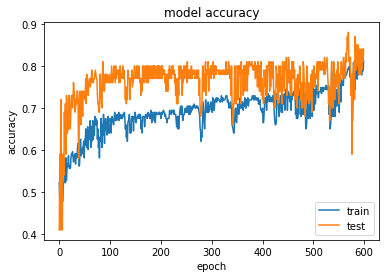

In [86]:
np.random.seed(1)
tf.random.set_seed(1)

model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=600, batch_size=303, verbose=1, shuffle=True)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h3>Model 8</h3>

Epoch 1/1200
1/1 [==============================] - 1s 771ms/step - loss: 0.7002 - acc: 0.5222 - val_loss: 6.3308 - val_acc: 0.4100
Epoch 2/1200
1/1 [==============================] - 0s 24ms/step - loss: 5.6677 - acc: 0.4778 - val_loss: 1.5314 - val_acc: 0.5900
Epoch 3/1200
1/1 [==============================] - 0s 31ms/step - loss: 1.7861 - acc: 0.5222 - val_loss: 1.2283 - val_acc: 0.4100
Epoch 4/1200
1/1 [==============================] - 0s 40ms/step - loss: 1.1138 - acc: 0.4778 - val_loss: 0.6779 - val_acc: 0.7200
Epoch 5/1200
1/1 [==============================] - 0s 35ms/step - loss: 0.6856 - acc: 0.5911 - val_loss: 0.8798 - val_acc: 0.5900
Epoch 6/1200
1/1 [==============================] - 0s 36ms/step - loss: 1.0044 - acc: 0.5222 - val_loss: 0.8038 - val_acc: 0.4100
Epoch 7/1200
1/1 [==============================] - 0s 36ms/step - loss: 0.7645 - acc: 0.4778 - val_loss: 0.7401 - val_acc: 0.4100
Epoch 8/1200
1/1 [==============================] - 0s 39ms/step - loss: 0.7212 - 

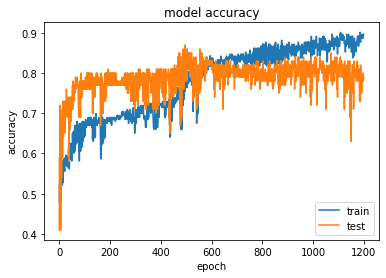

In [72]:
np.random.seed(1)
tf.random.set_seed(1)

model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=1200, batch_size=303, verbose=1, shuffle=True)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()